In [1]:
import json

file_path = './seggies-1-19.json'

with open(file_path, 'r') as file:
    data = json.load(file)

data

{'log': {'version': '1.2',
  'creator': {'name': 'WebInspector', 'version': '537.36'},
  'pages': [],
  'entries': [{'_connectionId': '75751',
    '_initiator': {'type': 'script',
     'stack': {'callFrames': [{'functionName': '',
        'scriptId': '29',
        'url': 'https://web-assets.strava.com/assets/core/_next/static/chunks/pages/_app-f0d3320f6b33599a.js',
        'lineNumber': 10,
        'columnNumber': 6583},
       {'functionName': '',
        'scriptId': '29',
        'url': 'https://web-assets.strava.com/assets/core/_next/static/chunks/pages/_app-f0d3320f6b33599a.js',
        'lineNumber': 10,
        'columnNumber': 10478},
       {'functionName': '',
        'scriptId': '29',
        'url': 'https://web-assets.strava.com/assets/core/_next/static/chunks/pages/_app-f0d3320f6b33599a.js',
        'lineNumber': 33,
        'columnNumber': 158646},
       {'functionName': 'A',
        'scriptId': '29',
        'url': 'https://web-assets.strava.com/assets/core/_next/static/ch

In [2]:
def flatten(d, out, key):
    if isinstance(d, dict):
        for k, v in d.items():
            flatten(v, out, key + k + "_")
    if isinstance(d, list):
        if len(d) == 0:
            return
        first = d[0]
        flatten(first, out, key + k + "_")
    else:
        out[key[:-1]] = d


    



In [2]:
for entry in data['log']['entries']:
    try:
        req = entry['request']
        res = entry['response']
        text = res['content']['text']
    
        d = json.loads(text)['data']
        segments = d['segments']
        # print(segments)
        for seggy in segments:
            leaderboards = seggy['leaderboards']
            for leaderboard in leaderboards:
                efforts = leaderboard['leaderboardEfforts']
                for effort in efforts:
                    # print(seggy)
                    break
                break
            break
        timeToBeat = effort['timing']['elapsedTime']
        measurements = seggy['measurements']
        distance = measurements['distance']
        avgGrade = measurements['avgGrade']
        totalEfforts = seggy['totalEfforts']

        speedToBeat = distance / timeToBeat * 60 * 60 /  1609



        print(speedToBeat, 'mph', seggy['metadata']['name'], distance / 1609)
        print(seggy)
    except:
        pass

28.774254572802295 mph South Shore Sprint (North) 1.2948414557761032
{'metadata': {'name': 'South Shore Sprint (North)', 'activityType': 'Ride', 'climbCategory': None, 'verifiedStatus': None}, 'measurements': {'distance': 2083.39990234375, 'avgGrade': -0.009599690325558186, 'elevHigh': 180.10000610351562, 'elevLow': 179.10000610351562}, 'elevationChart': {'url': 'https://d3o5xota0a1fcr.cloudfront.net/v6/charts/QVC2C334J7AQAH2AXOB2B2NFIZPNVUMCXUNKDTD5OXJXQRHOV6MLZE3RZACFNWOOLMBWRUYABU======'}, 'totalAthletes': 7274, 'totalEfforts': 54490, 'athletePrEffort': {'timing': {'elapsedTime': 225}, 'activity': {'id': '11938636904'}}, 'leaderboards': [{'leaderboardEfforts': [{'athlete': {'id': '151980', 'firstName': 'Zachary', 'lastName': 'May'}, 'activity': {'id': '1783651723'}, 'timing': {'elapsedTime': 162}}, {'athlete': {'id': '516015', 'firstName': 'Geoffrey', 'lastName': 'Albert'}, 'activity': {'id': '4416030293'}, 'timing': {'elapsedTime': 163}}, {'athlete': {'id': '40913287', 'firstName':

In [3]:
def flatten(d, out, key):
    if isinstance(d, dict):
        for k, v in d.items():
            flatten(v, out, key + k + "_")
    elif isinstance(d, list):
        if len(d) == 0:
            return
        first = d[0]
        flatten(first, out, key)
    else:
        out[key[:-1]] = d

rows = []

for entry in data['log']['entries']:
    try:
        req = entry['request']
        res = entry['response']
        text = res['content']['text']
    
        d = json.loads(text)['data']
        segments = d['segments']
        
        out = {}
        flat = flatten(segments, out, "")
        print(out)
        rows.append(out)
    except Exception as e:
        # print(e)
        pass

{'metadata_name': 'South Shore Sprint (North)', 'metadata_activityType': 'Ride', 'metadata_climbCategory': None, 'metadata_verifiedStatus': None, 'measurements_distance': 2083.39990234375, 'measurements_avgGrade': -0.009599690325558186, 'measurements_elevHigh': 180.10000610351562, 'measurements_elevLow': 179.10000610351562, 'elevationChart_url': 'https://d3o5xota0a1fcr.cloudfront.net/v6/charts/QVC2C334J7AQAH2AXOB2B2NFIZPNVUMCXUNKDTD5OXJXQRHOV6MLZE3RZACFNWOOLMBWRUYABU======', 'totalAthletes': 7274, 'totalEfforts': 54490, 'athletePrEffort_timing_elapsedTime': 225, 'athletePrEffort_activity_id': '11938636904', 'leaderboards_leaderboardEfforts_athlete_id': '151980', 'leaderboards_leaderboardEfforts_athlete_firstName': 'Zachary', 'leaderboards_leaderboardEfforts_athlete_lastName': 'May', 'leaderboards_leaderboardEfforts_activity_id': '1783651723', 'leaderboards_leaderboardEfforts_timing_elapsedTime': 162}
{'metadata_name': 'South Chicago Ave NB from Commercial to 83rd', 'metadata_activityTy

In [4]:
import pandas as pd

df = pd.DataFrame(rows)
df = df.drop_duplicates(subset='metadata_name', keep='first')
df['distance_miles'] = df['measurements_distance'] / 1609.34
df['cr_speed'] = df['distance_miles'] / df['leaderboards_leaderboardEfforts_timing_elapsedTime'] * 60 * 60
df.to_csv('seggies.csv')
df

metadata_name metadata_activityType  \
0                      South Shore Sprint (North)                  Ride   
1    South Chicago Ave NB from Commercial to 83rd                  Ride   
2                              LSD Ewing to 87th                   Ride   
3                                   Slip N’ Slide                  Ride   
4                         DARC- Uninterrupted 566                  Ride   
..                                            ...                   ...   
161                              Northfield North                  Ride   
162                           PUTTING ON THE RITZ                  Ride   
163                      Willow to Willow (south)                  Ride   
164                       Tower Rd. - Bahai House                  Ride   
165                  Green Bay Rd Tower to Asbury                  Ride   

    metadata_climbCategory metadata_verifiedStatus  measurements_distance  \
0                     None                    None            2083.399902   
1                     None                    None            2749.500000   
2                     None                    None             871.799988   
3                     None                    None             550.500000   
4                     None                    None            1186.000000   
..                     ...                     ...                    ...   
161                   None                    None             727.799988   
162                   None                    None             393.799988   
163                   None                    None             490.100006   
164                   None                    None            6998.100098   
165                   None                    None            8172.100098   

     measurements_avgGrade  measurements_elevHigh  measurements_elevLow  \
0                -0.009600             180.100006            179.100006   
1                 0.116385             183.600006            178.399994   
2                 0.000000             194.600006            191.800003   
3                 0.399637             181.800003            176.199997   
4                 0.202361             175.199997            172.399994   
..                     ...                    ...                   ...   
161               0.137400             190.600006            187.800003   
162               0.000000             190.600006            190.600006   
163              -0.754948             194.500000            190.800003   
164              -0.185765             201.000000            177.399994   
165              -0.264314             167.000000            145.399994   

                                    elevationChart_url  totalAthletes  ...  \
0    https://d3o5xota0a1fcr.cloudfront.net/v6/chart...           7274  ...   
1    https://d3o5xota0a1fcr.cloudfront.net/v6/chart...            409  ...   
2    https://d3o5xota0a1fcr.cloudfront.net/v6/chart...           9315  ...   
3    https://d3o5xota0a1fcr.cloudfront.net/v6/chart...           7602  ...   
4    https://d3o5xota0a1fcr.cloudfront.net/v6/chart...           9308  ...   
..                                                 ...            ...  ...   
161  https://d3o5xota0a1fcr.cloudfront.net/v6/chart...           2473  ...   
162  https://d3o5xota0a1fcr.cloudfront.net/v6/chart...           4784  ...   
163  https://d3o5xota0a1fcr.cloudfront.net/v6/chart...           1567  ...   
164  https://d3o5xota0a1fcr.cloudfront.net/v6/chart...           8785  ...   
165  https://d3o5xota0a1fcr.cloudfront.net/v6/chart...           1234  ...   

     athletePrEffort_timing_elapsedTime  athletePrEffort_activity_id  \
0                                 225.0                  11938636904   
1                                   NaN                          NaN   
2                                  88.0                  12171900275   
3                                  64.0                  11598474763   
4           

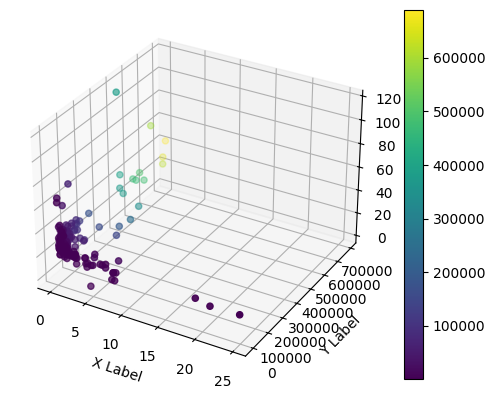

In [8]:
import matplotlib.pyplot as plt

# plt.scatter3d(df['distance_miles'], df['measurements_avgGrade'], df['cr_speed'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(df['distance_miles'], df['totalEfforts'], df['cr_speed'], c=df['totalEfforts'])

# Add labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Add color bar
plt.colorbar(sc)

# Show plot
plt.show()

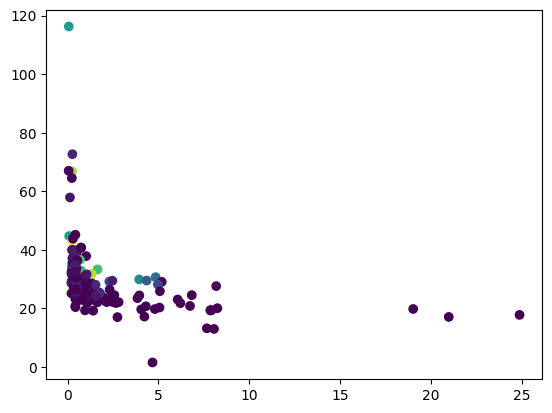

In [9]:
plt.scatter(df['distance_miles'], df['cr_speed'], c=df['totalEfforts'])

# Show plot
plt.show()

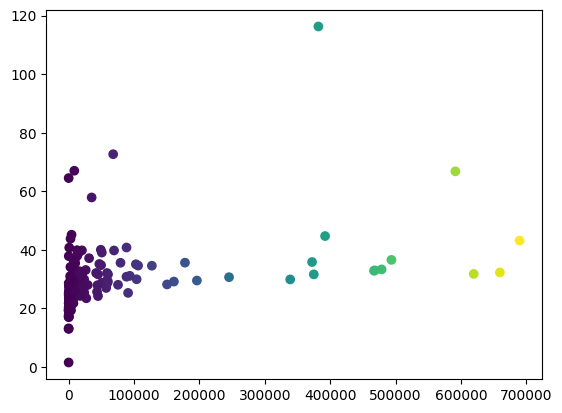

In [10]:
plt.scatter(df['totalEfforts'], df['cr_speed'], c=df['totalEfforts'])

# Show plot
plt.show()

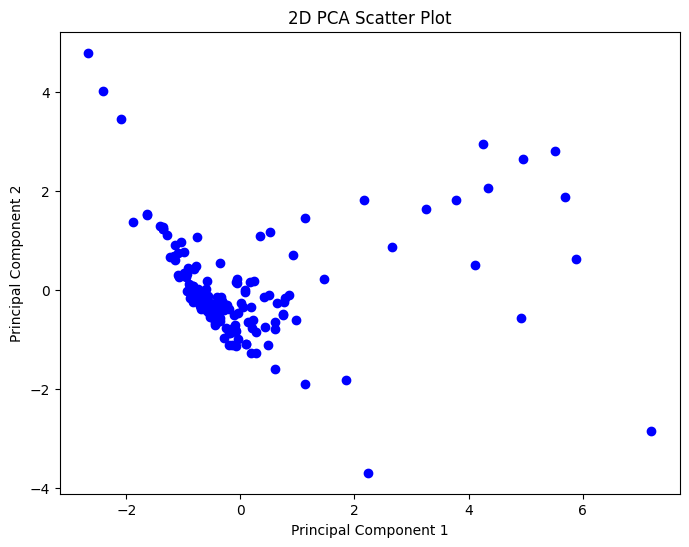

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
cols = ['distance_miles', 'measurements_avgGrade', 'cr_speed', 'totalAthletes', 'totalEfforts']
scaled_data = scaler.fit_transform(df[cols])

pca = PCA(n_components=2)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot')
plt.show()

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate sample data
X = torch.tensor(df[['distance_miles', 'measurements_avgGrade', 'totalAthletes', 'totalEfforts']].to_numpy(), dtype=torch.float32)
y = torch.tensor(df[['cr_speed']].to_numpy(), dtype=torch.float32)

# # Custom NLL loss function for Gaussian distribution
# def nll_gaussian(y_true, y_pred):
#     mean = y_pred[:, 0]
#     variance = tf.math.softplus(y_pred[:, 1])  # Ensure variance is positive
#     return tf.reduce_mean(0.5 * tf.math.log(2.0 * np.pi * variance) + 0.5 * tf.math.square(y_true - mean) / variance)

X, y

(tensor([[ 1.2946e+00, -9.5997e-03,  7.2740e+03,  5.4490e+04],
         [ 1.7085e+00,  1.1638e-01,  4.0900e+02,  1.8810e+03],
         [ 5.4171e-01,  0.0000e+00,  9.3150e+03,  6.9402e+04],
         [ 3.4207e-01,  3.9964e-01,  7.6020e+03,  4.6939e+04],
         [ 7.3695e-01,  2.0236e-01,  9.3080e+03,  8.8508e+04],
         [ 4.3563e-01, -5.0934e-02,  1.6130e+04,  1.7787e+05],
         [ 1.9597e+00, -6.3416e-03,  2.4800e+02,  1.0810e+03],
         [ 4.2261e+00, -1.4703e-02,  5.0000e+00,  9.0000e+00],
         [ 4.7672e-01, -2.0855e-01,  8.0000e+01,  1.5300e+02],
         [ 4.6628e-01, -2.6653e-02,  7.7400e+02,  4.5580e+03],
         [ 2.2942e+00,  2.7084e-03,  1.4292e+04,  1.6096e+05],
         [ 1.0580e+00, -1.7619e-01,  6.9300e+02,  3.1320e+03],
         [ 8.9484e-01,  0.0000e+00,  2.6400e+02,  1.1720e+03],
         [ 1.3231e+00,  9.3928e-02,  6.5800e+02,  5.2340e+03],
         [ 1.0724e+00, -5.2150e-02,  9.2000e+01,  2.7500e+02],
         [ 4.8815e-01,  0.0000e+00,  2.1316e+04,  3.722

In [25]:
def nll_loss(y_true, y_pred_mean, y_pred_var):
    # return nn.GaussianNLLLoss(y_pred_mean, y_true, y_pred_var)
    nll = 0.5 * torch.log(2 * torch.pi * y_pred_var) + 0.5 * (y_true - y_pred_mean) ** 2 / y_pred_var
    return nll.mean()

class DistributionPredictor(nn.Module):
    def __init__(self, inputShape):
        super(DistributionPredictor, self).__init__()
        self.fc1 = nn.Linear(inputShape[-1], 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc_mean = nn.Linear(4, 1)  # Predict mean
        self.fc_var = nn.Linear(4, 1)  # Predict log variance

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        mean = torch.abs(self.fc_mean(x))
        var = torch.abs(self.fc_var(x))  # We predict log(variance) for stability
        return mean, var

In [31]:
model = DistributionPredictor(X.shape)
optimizer = optim.Adam(model.parameters(), lr=0.01)

nll = nn.GaussianNLLLoss()

min_loss = float('inf')

In [32]:
from torch.utils.data import Dataset, DataLoader

# Custom dataset
class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

dataloader = DataLoader(MyDataset(X, y), batch_size=16, shuffle=True)

# Training loop
for epoch in range(10000):
    model.train()
    for batch_data, batch_targets in dataloader:
        optimizer.zero_grad()

        # Forward pass
        mean, var = model(X)

        # Compute NLL loss
        loss = nll_loss(mean, y, var)

        # min_loss = torch.min(loss, min_loss)
        # if loss > 0.

        # Backpropagate and update the model
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}')

last_loss


Epoch [10], Loss: 31.6208
Epoch [20], Loss: 30.4488
Epoch [30], Loss: 29.7429
Epoch [40], Loss: 28.9649
Epoch [50], Loss: 28.1011
Epoch [60], Loss: 27.1745
Epoch [70], Loss: 26.0865
Epoch [80], Loss: 19.7436
Epoch [90], Loss: 14.9704
Epoch [100], Loss: 14.2611
Epoch [110], Loss: 13.6121
Epoch [120], Loss: 12.9979
Epoch [130], Loss: 12.4183
Epoch [140], Loss: 11.8636
Epoch [150], Loss: 11.3355
Epoch [160], Loss: 10.8355
Epoch [170], Loss: 10.3648
Epoch [180], Loss: 9.9241
Epoch [190], Loss: 9.5127
Epoch [200], Loss: 9.1316
Epoch [210], Loss: 8.7800
Epoch [220], Loss: 8.4568
Epoch [230], Loss: 8.1606
Epoch [240], Loss: 7.8892
Epoch [250], Loss: 7.6415
Epoch [260], Loss: 7.4157
Epoch [270], Loss: 7.2099
Epoch [280], Loss: 7.0224
Epoch [290], Loss: 6.8516
Epoch [300], Loss: 6.6975
Epoch [310], Loss: 6.5541
Epoch [320], Loss: 6.4249
Epoch [330], Loss: 6.3068
Epoch [340], Loss: 6.1997
Epoch [350], Loss: 6.1006
Epoch [360], Loss: 6.0104
Epoch [370], Loss: 5.9282
Epoch [380], Loss: 5.8523
Epoc

KeyboardInterrupt: 

In [35]:
model.eval()

mean, var = model(X)
var

tensor([[118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [  1.5583],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [  1.4365],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [  1.8181],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
        [  1.5628],
        [118.6448],
        [118.6448],
        [118.6448],
        [118.6448],
